In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import gym
import vgdl.interfaces.gym as vdgym
import vgdl

In [3]:
vdgym.register_sample_games()

In [4]:
vdgym.list_space

<module 'vgdl.interfaces.gym.list_space' from '/home/irafm/hyner/vgdl_2_0/py-vgdl/vgdl/interfaces/gym/list_space.py'>

In [5]:
gym.envs.registry

├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
├──HumanoidStandup: [ v2 ]
├──vgdl_aliens: [ v0 ]
├──vgdl_aliens_objects: [ v0 ]
├──vgdl_aliens_features: [ v0 ]
├──vgdl_boulderdash: [ v0 ]
├──vgdl_boulderdash_objects: [ v0 ]
├──vgdl_boulderdash_features: [ v0 ]
├──vgdl_chase: [ v0 ]
├──vgdl_chase_objects: [ v0 ]
├──vgdl_chase_features: [ v0 ]
├──vgdl_frogs: [ v0 ]
├──vgdl_frogs_objects: [ v0 ]
├──vgdl_frogs_features: [ v0 ]
├──vgdl_missilecomma

In [6]:
game = gym.make('vgdl_sokoban-v0')
game.reset()

AttributeError: 'NoneType' object has no attribute 'get_image'

In [7]:
gym.__version__

'0.23.1'

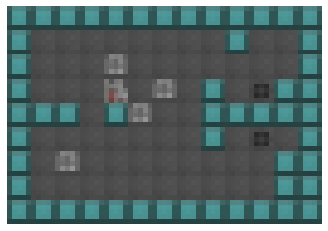

(240,)
[(4, 3) list([0.0, 0.0]) list([1.0, 0.0, 0.0, 0.0]) list([]) (10, 3)
 list([0.0, 0.0]) list([0.0, 1.0, 0.0, 0.0]) list([]) (10, 5)
 list([0.0, 0.0]) list([0.0, 1.0, 0.0, 0.0]) list([]) (4, 2)
 list([0.0, 0.0]) list([0.0, 0.0, 1.0, 0.0]) list([]) (6, 3)
 list([0.0, 0.0]) list([0.0, 0.0, 1.0, 0.0]) list([]) (5, 4)
 list([0.0, 0.0]) list([0.0, 0.0, 1.0, 0.0]) list([]) (2, 6)
 list([0.0, 0.0]) list([0.0, 0.0, 1.0, 0.0]) list([]) (0, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (1, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (2, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (3, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (4, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (5, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (6, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (7, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (8, 0)
 list([0.0, 0.0]) list([0.0, 0.0, 0.0, 1.0]) list([]) (9, 0)
 list([0

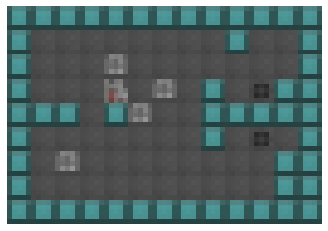

In [8]:
import gnwrapper
import gym

env = gnwrapper.Animation(gym.make('vgdl_sokoban-v0', obs_type="objects"))
env.render()
obs = env.reset()

for _ in range(1000):
    next_obs, reward, done, info = env.step(env.action_space.sample())
    env.render()

    obs = next_obs
    print(obs.shape)
    print(obs)
    print(env.notable_sprites)
    print(env.game.get_game_state())
    break

    if done:
        obs = env.reset()

In [9]:
import itertools
import heapq as hq
from dataclasses import dataclass, field
from typing import Any,List,Tuple

@dataclass(order=True)
class Subgoal:
    priority: int
    previous_actions: list
    info: Any=field(compare=False)


class PriorityQueue:
    def __init__(self):
        self.elements: List[Subgoal] = []

    def empty(self) -> bool:
        return not self.elements

    def put(self, item: Subgoal):
        hq.heappush(self.elements,item)

    def get(self) -> Subgoal:
        return hq.heappop(self.elements)

    def merge(self,items: List):
        for item in items:
            hq.heappush(self.elements,item)

In [10]:
env = gym.make('vgdl_sokoban-v0', obs_type="objects")
obs = env.reset()
first_state_info = env.game.get_game_state()
first_state = Subgoal(priority=0, previous_actions=[],\
                      info=first_state_info)
frontier = PriorityQueue()
frontier.put(first_state)

def evaluate_state(state):
    return 0;



def visualize_actions(action_list, current_state):
    env = gnwrapper.Monitor(gym.make('vgdl_sokoban-v0', obs_type="objects"))
    env.reset()
    env.game.set_game_state(current_state)
    print(current_state.keys())
    for i in action_list:
        next_obs, reward, done, info = env.step(i)
    return env
seen_states = {first_state_info}
for i in range(100):
    if len(frontier.elements)==0:
        #print(f"no more subgoals on {i}th iteration")
        break
    #else: print('frontier size:',len(frontier.elements))
    current = frontier.get()
    state = current.info
    env.game.set_game_state(state)
    for i, a in enumerate(env.game.get_possible_actions()):
        next_obs, reward, done, info = env.step(i)
        if done:
            env.game.set_game_state(state)
            continue
        new_state = env.game.get_game_state()
        if done or new_state in seen_states:
            env.game.set_game_state(state)
            continue
        seen_states.add(new_state)
        actions = current.previous_actions+[i]
        new_state = Subgoal(evaluate_state(new_state), actions, new_state)
        frontier.put(new_state)
        env.game.set_game_state(state)

tmp_state = frontier.get()
tmp_state = frontier.get()
print(tmp_state.previous_actions)
env = visualize_actions(tmp_state.previous_actions, first_state_info)

[0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 3, 3, 0, 0, 2, 0, 0, 0, 0, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 3, 1, 1, 3, 3, 0, 0, 3, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 3, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 3, 3, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 3, 3, 1, 1, 1, 0, 0, 0, 3]
KeysView(GameState(time=0, score=0, reward=0, ended=False, avatar=(pos=(4, 3), alive=True)))


/home/irafm/miniconda3/envs/vgdl37/lib/python3.7/site-packages/gym/wrappers/monitoring/video_recorder.py:44: DeprecationWarning: WARN: `env.metadata["render.modes"] is marked as deprecated and will be replaced with `env.metadata["render_modes"]` see https://github.com/openai/gym/pull/2654 for more details
  '`env.metadata["render.modes"] is marked as deprecated and will be replaced with `env.metadata["render_modes"]` '
/home/irafm/miniconda3/envs/vgdl37/lib/python3.7/site-packages/gym/wrappers/monitoring/video_recorder.py:116: DeprecationWarning: WARN: `env.metadata["video.frames_per_second"] is marked as deprecated and will be replaced with `env.metadata["render_fps"]` see https://github.com/openai/gym/pull/2654 for more details
  '`env.metadata["video.frames_per_second"] is marked as deprecated and will be replaced with `env.metadata["render_fps"]` '
/home/irafm/miniconda3/envs/vgdl37/lib/python3.7/site-packages/gym/wrappers/monitoring/video_recorder.py:422: DeprecationWarning: distu

In [11]:
env.observer.notable_sprites

['avatar', 'hole', 'box', 'wall']

In [12]:
with open (game_file, "r") as gf:
    game_desc = gf.read()
with open (level_file, "r") as lf:
    level_desc = lf.read()

domain = vgdl.VGDLParser.parse_game(game_desc)


NameError: name 'game_file' is not defined

In [ ]:
env = gnwrapper.Monitor(gym.make('vgdl_survivezombies-v0', obs_type="objects"))
print(dir(env.game))

In [ ]:
dir(env.game.domain)

In [ ]:
env.game.domain.terminations[1].win

In [ ]:
dir(env.game.domain.collision_eff[0])

In [ ]:
env.game.domain.collision_eff[1].call_fn

In [ ]:
len(env.game.domain.collision_eff)

In [ ]:
[f.call_fn for f in env.game.domain.collision_eff]

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.DiGraph()
g.add_edge(1,2)
nx.draw(g)
plt.show()

In [ ]:
temp = {1: "Timeout Win", }

In [ ]:
import os

for i in os.walk("vgdl/games"):
    for j in i[2]:
        if "_" not in j and j[-3:] == "txt":
            game_name = "vgdl_" + j.split(".")[0] + "-v0"
            env = gnwrapper.Monitor(gym.make(game_name, obs_type="objects"))
            if check_conditions(env):
                print("*"*30)
                for t in env.game.domain.terminations:
                    print("*"*10)
                    print(
                            t.limit,
                            t.score,
                            t.stype,
                            t.win)

            #print(game_name, env.game.domain.terminations)

In [ ]:
def check_conditions(env):
    isSpriteCounter = True
    for i in env.game.domain.terminations:
        if not type(i) == vgdl.ontology.terminations.SpriteCounter:
            isSpriteCounter = False
    return isSpriteCounter

In [ ]:
dir(env.game.domain.terminations[0])

In [28]:
def create_nodes(env):
    for i in env.game.domain.terminations:
        if(i.win):
            G = nx.DiGraph()
            create_win_graph(i.stype, env.game.domain.collision_eff,G,0,{})
    return G

In [48]:
def create_win_graph(stype, collision_eff,G,root_id,dic):
    last_id = root_id + 1
    for ef in collision_eff:
        print(stype,ef.actee_stype,ef.call_fn)
        if check_eff(ef.actor_stype,stype,ef.call_fn):
            print(stype,ef.actee_stype,ef.call_fn)
            at = ef.actee_stype
            if not at in dic:
                dic[at] = last_id
                #last_id += 1
            G.add_edge(dic[at],root_id)
            last_id,G,dic = create_win_graph(at,collision_eff,G,dic[at],dic)
    return last_id,G,dic



box wall <function stepBack at 0x7fd0470b57a0>
box avatar <function bounceForward at 0x7fd0470b58c0>
box wall <function undoAll at 0x7fd0470b5830>
box box <function undoAll at 0x7fd0470b5830>
box hole <function killSprite at 0x7fd0470a33b0>
box hole <function killSprite at 0x7fd0470a33b0>
hole wall <function stepBack at 0x7fd0470b57a0>
hole avatar <function bounceForward at 0x7fd0470b58c0>
hole wall <function undoAll at 0x7fd0470b5830>
hole box <function undoAll at 0x7fd0470b5830>
hole hole <function killSprite at 0x7fd0470a33b0>


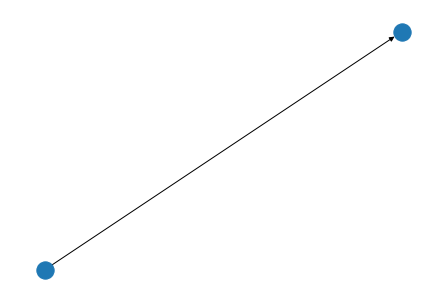

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

env = gnwrapper.Monitor(gym.make("vgdl_sokoban-v0", obs_type="objects"))
G=create_nodes(env)
nx.draw(G)
plt.show()

In [33]:
def check_eff(actor_stype, stype, call_fn):
    remove_fns = [vgdl.ontology.effects.killSprite]
    if(actor_stype == stype and call_fn in remove_fns):
        return True
    return False

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1]
 [1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1]
 [1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(11, 24)


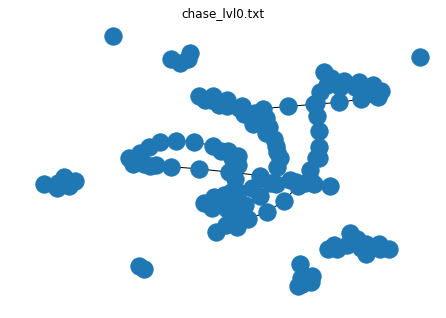

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(11, 19)


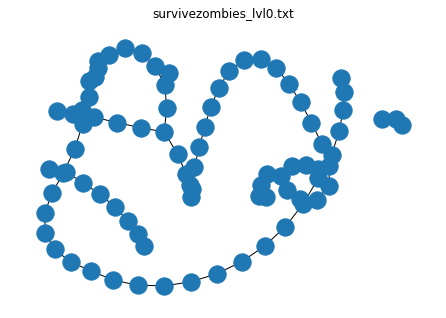

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(11, 19)


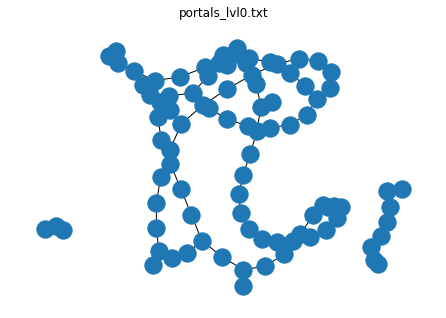

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
(11, 30)


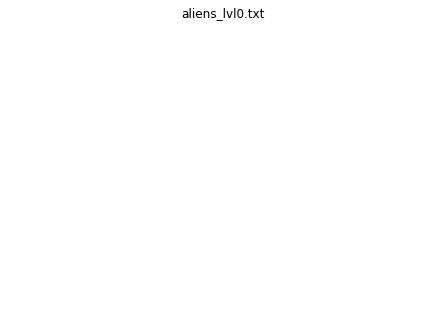

[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 1 0 0 1 1]
 [1 1 1 0 1 0 0 0 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]]
(9, 13)


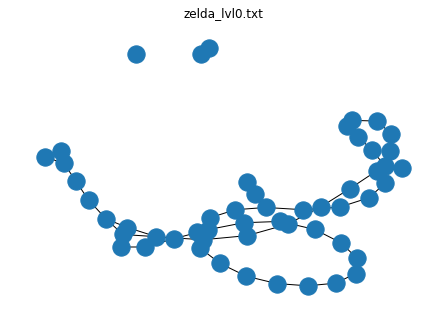

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(11, 28)


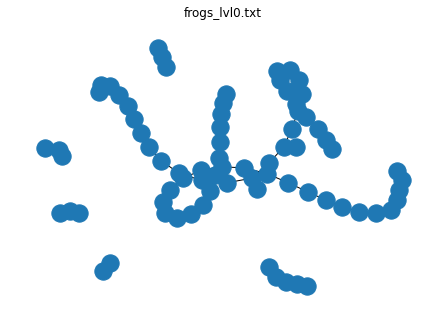

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(13, 26)


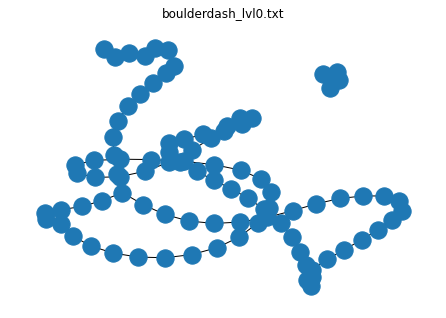

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
(12, 24)


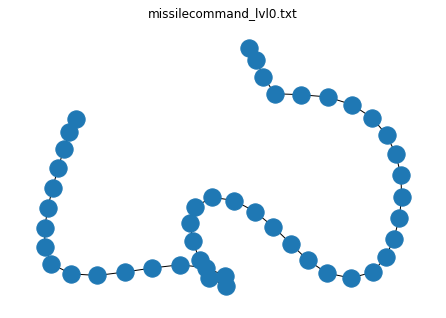

[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 1 1]
 [1 1 1 0 1 0 0 0 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]]
(9, 13)


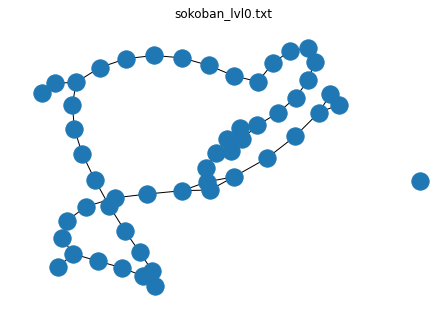

{'chase_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc815ed6fd0>,
 'survivezombies_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc818e89c10>,
 'portals_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc816a0c490>,
 'aliens_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc818932850>,
 'zelda_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc8163f6790>,
 'frogs_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc818e03b10>,
 'boulderdash_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc818e010d0>,
 'missilecommand_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc815da9b10>,
 'sokoban_lvl0.txt': <networkx.classes.graph.Graph at 0x7fc818e7de90>}

In [166]:
import glob
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import networkx as nx
import io
import ast
def create_matrix_from_layout(folder):
    files = glob.glob(folder)
    graph_set = {}
    for f in files:
        fname = os.path.basename(f)
        with open(f, "r") as tmp:
            tmp_data = tmp.read()
        tmp_data = re.sub(r"[^wA\n]", r"0", tmp_data)
        tmp_data = tmp_data.replace("w", "1").replace("A", "0")
        tmp_data = re.sub(r'([A-Za-z0-9])', r"\1,", tmp_data)
        tmp = tmp_data.split()
        tmp = [x[:-1] for x in tmp]
        tmp = [item + ':' for item in tmp]
        tmp = [line.split(':') for line in tmp]
        tmp = [i[:1] for i in tmp]
        tmp = [elem.split(',') for e in tmp for elem in e]
        tmp = [[int(num) for num in e[:]] for e in tmp]
        arr = np.array(tmp)
        print(arr)
        print(arr.shape)
        coor = np.array(list(product(*map(range, arr.shape))))
        G = nx.grid_2d_graph(*arr.shape)
        G.remove_nodes_from(map(tuple, coor[arr.flatten() == 0]))
        graph_set[fname] = G
        nx.draw(G)
        plt.title(fname)
        plt.show()
    return graph_set

create_matrix_from_layout("/home/irafm/hyner/vgdl_2_0/py-vgdl/vgdl/layouts/*.txt")